In [49]:
import numpy as np
import pandas as pd
import string
import spacy
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#loading the dataset which we have taken from flipkart, iphone 11 reviews

In [3]:
dt= pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)
dt

<ipython-input-3-11e00a455e0a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dt= pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/apple.txt",error_bad_lines=False)
Skipping line 6: expected 1 fields, saw 14



,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       40 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [5]:
dt.isna().sum()

x    0
dtype: int64

In [6]:
dt = [x.strip() for x in dt.x]
dt = [x for x in dt if x]

In [7]:
review = ' '.join(dt)
review

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [9]:
#taking out punctuation

In [11]:
no_punc= review.translate(str.maketrans('','',string.punctuation))
no_punc

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [12]:
#importing nltk

In [13]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
#performing tokenization

In [15]:
from nltk.tokenize import word_tokenize

In [16]:
tokenized= word_tokenize(no_punc)

In [17]:
tokenized

['Its',
 'amazing',
 'battery',
 'last',
 'around',
 '10',
 '12',
 'hrsbest',
 'laptop',
 'for',
 'students',
 'and',
 'coders',
 'Finally',
 'a',
 'MacBook',
 'possession',
 'Got',
 'it',
 'in',
 '50k',
 'in',
 'Diwali',
 'sale',
 'Technically',
 'good',
 'laptopGood',
 'Newsluxury',
 'product',
 'niche',
 'technology',
 'good',
 'battery',
 'life',
 'reliable',
 'machine',
 'other',
 'laptops',
 'crash',
 'and',
 'become',
 'defunct',
 'in',
 '610',
 'years',
 'no',
 'antivirus',
 'required',
 'security',
 'of',
 'data',
 'and',
 'transactions',
 'much',
 'better',
 'Terrific',
 'sense',
 'of',
 'possession',
 'prideBad',
 'News',
 'Problems',
 'will',
 'be',
 'there',
 'if',
 'you',
 'are',
 'switching',
 'from',
 'windows',
 'based',
 'system',
 'very',
 'less',
 'space',
 'in',
 'hard',
 'disk',
 'no',
 'CD',
 'drive',
 'inability',
 'to',
 'transfer',
 'data',
 'from',
 'Mac',
 'to',
 'your',
 'existing',
 'external',
 'hard',
 'disc',
 'unless',
 'you',
 'format',
 'it',
 'apps'

In [18]:
#removing stop-words

In [19]:
from nltk.corpus import stopwords

In [20]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop_words = stopwords.words('english')
stop_words.append('the')
stop_words.append('Its')

In [22]:
nostop_tokenized = [word for word in tokenized if not word in stop_words]

In [23]:
#making all words lower

In [24]:
lower_words = [x.lower() for x in nostop_tokenized]
print(lower_words[0:25])

['amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology', 'good']


In [25]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])

['amaz', 'batteri', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'student', 'coder']


In [27]:
!python -m spacy download en

2023-11-23 08:17:39.792478: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 08:17:39.792645: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 08:17:39.792806: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 08:17:42.075905: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.0 MB/s eta 0:00:00
✔ Download and installation succe

In [28]:
#importing NLP
nlp = spacy.load('en_core_web_sm')

In [30]:
document = nlp(' '.join(nostop_tokenized))

In [33]:
#lemmatization
lemmas = [token.lemma_ for token in document]

In [34]:
#importing affin dataset for sentimental analysis

In [36]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [37]:
from nltk import tokenize
review1 = tokenize.sent_tokenize(" ".join(dt))

In [38]:
rev_dt=pd.DataFrame(review1, columns=['sentence'])

In [39]:
#affinityscore

In [40]:
affscores = afinn.set_index('word')['value'].to_dict()

In [41]:
#NLP

In [62]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affscores

def cal_senti(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [63]:
rev_dt["sentimental_val"]=rev_dt['sentence'].apply(cal_senti)

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.
Got it in 50k in Diwali sale.
Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.
Terrific sense of possession & pride.Bad News.
Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !
!
), all printers are not compatible (e.g.
the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by workin

In [64]:
rev_dt

,sentence,sentimental_val
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
183,You can get one of the best movie experiences ...,3
184,Overall I would it a 4.5/5.,0
185,"I got a great deal on this laptop, which I hav...",3
186,I got it not only on discount but also was abl...,0


In [65]:
rev_dt["sentimental_val"].unique()

array([  7,   0,   5,   4, -11,   1,  -3,  -2,  -1,   2,   3,   6,  -5,
        24,  -6,  -4,  -8,  17])

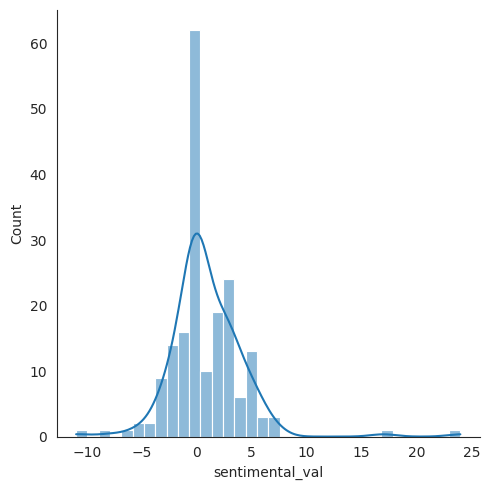

In [66]:
#visualization
sns.set_style(style='white')
sns.displot(data=rev_dt,x='sentimental_val',kde=True)
plt.show()

In [67]:
#creating wordcloud

In [68]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [71]:
#wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

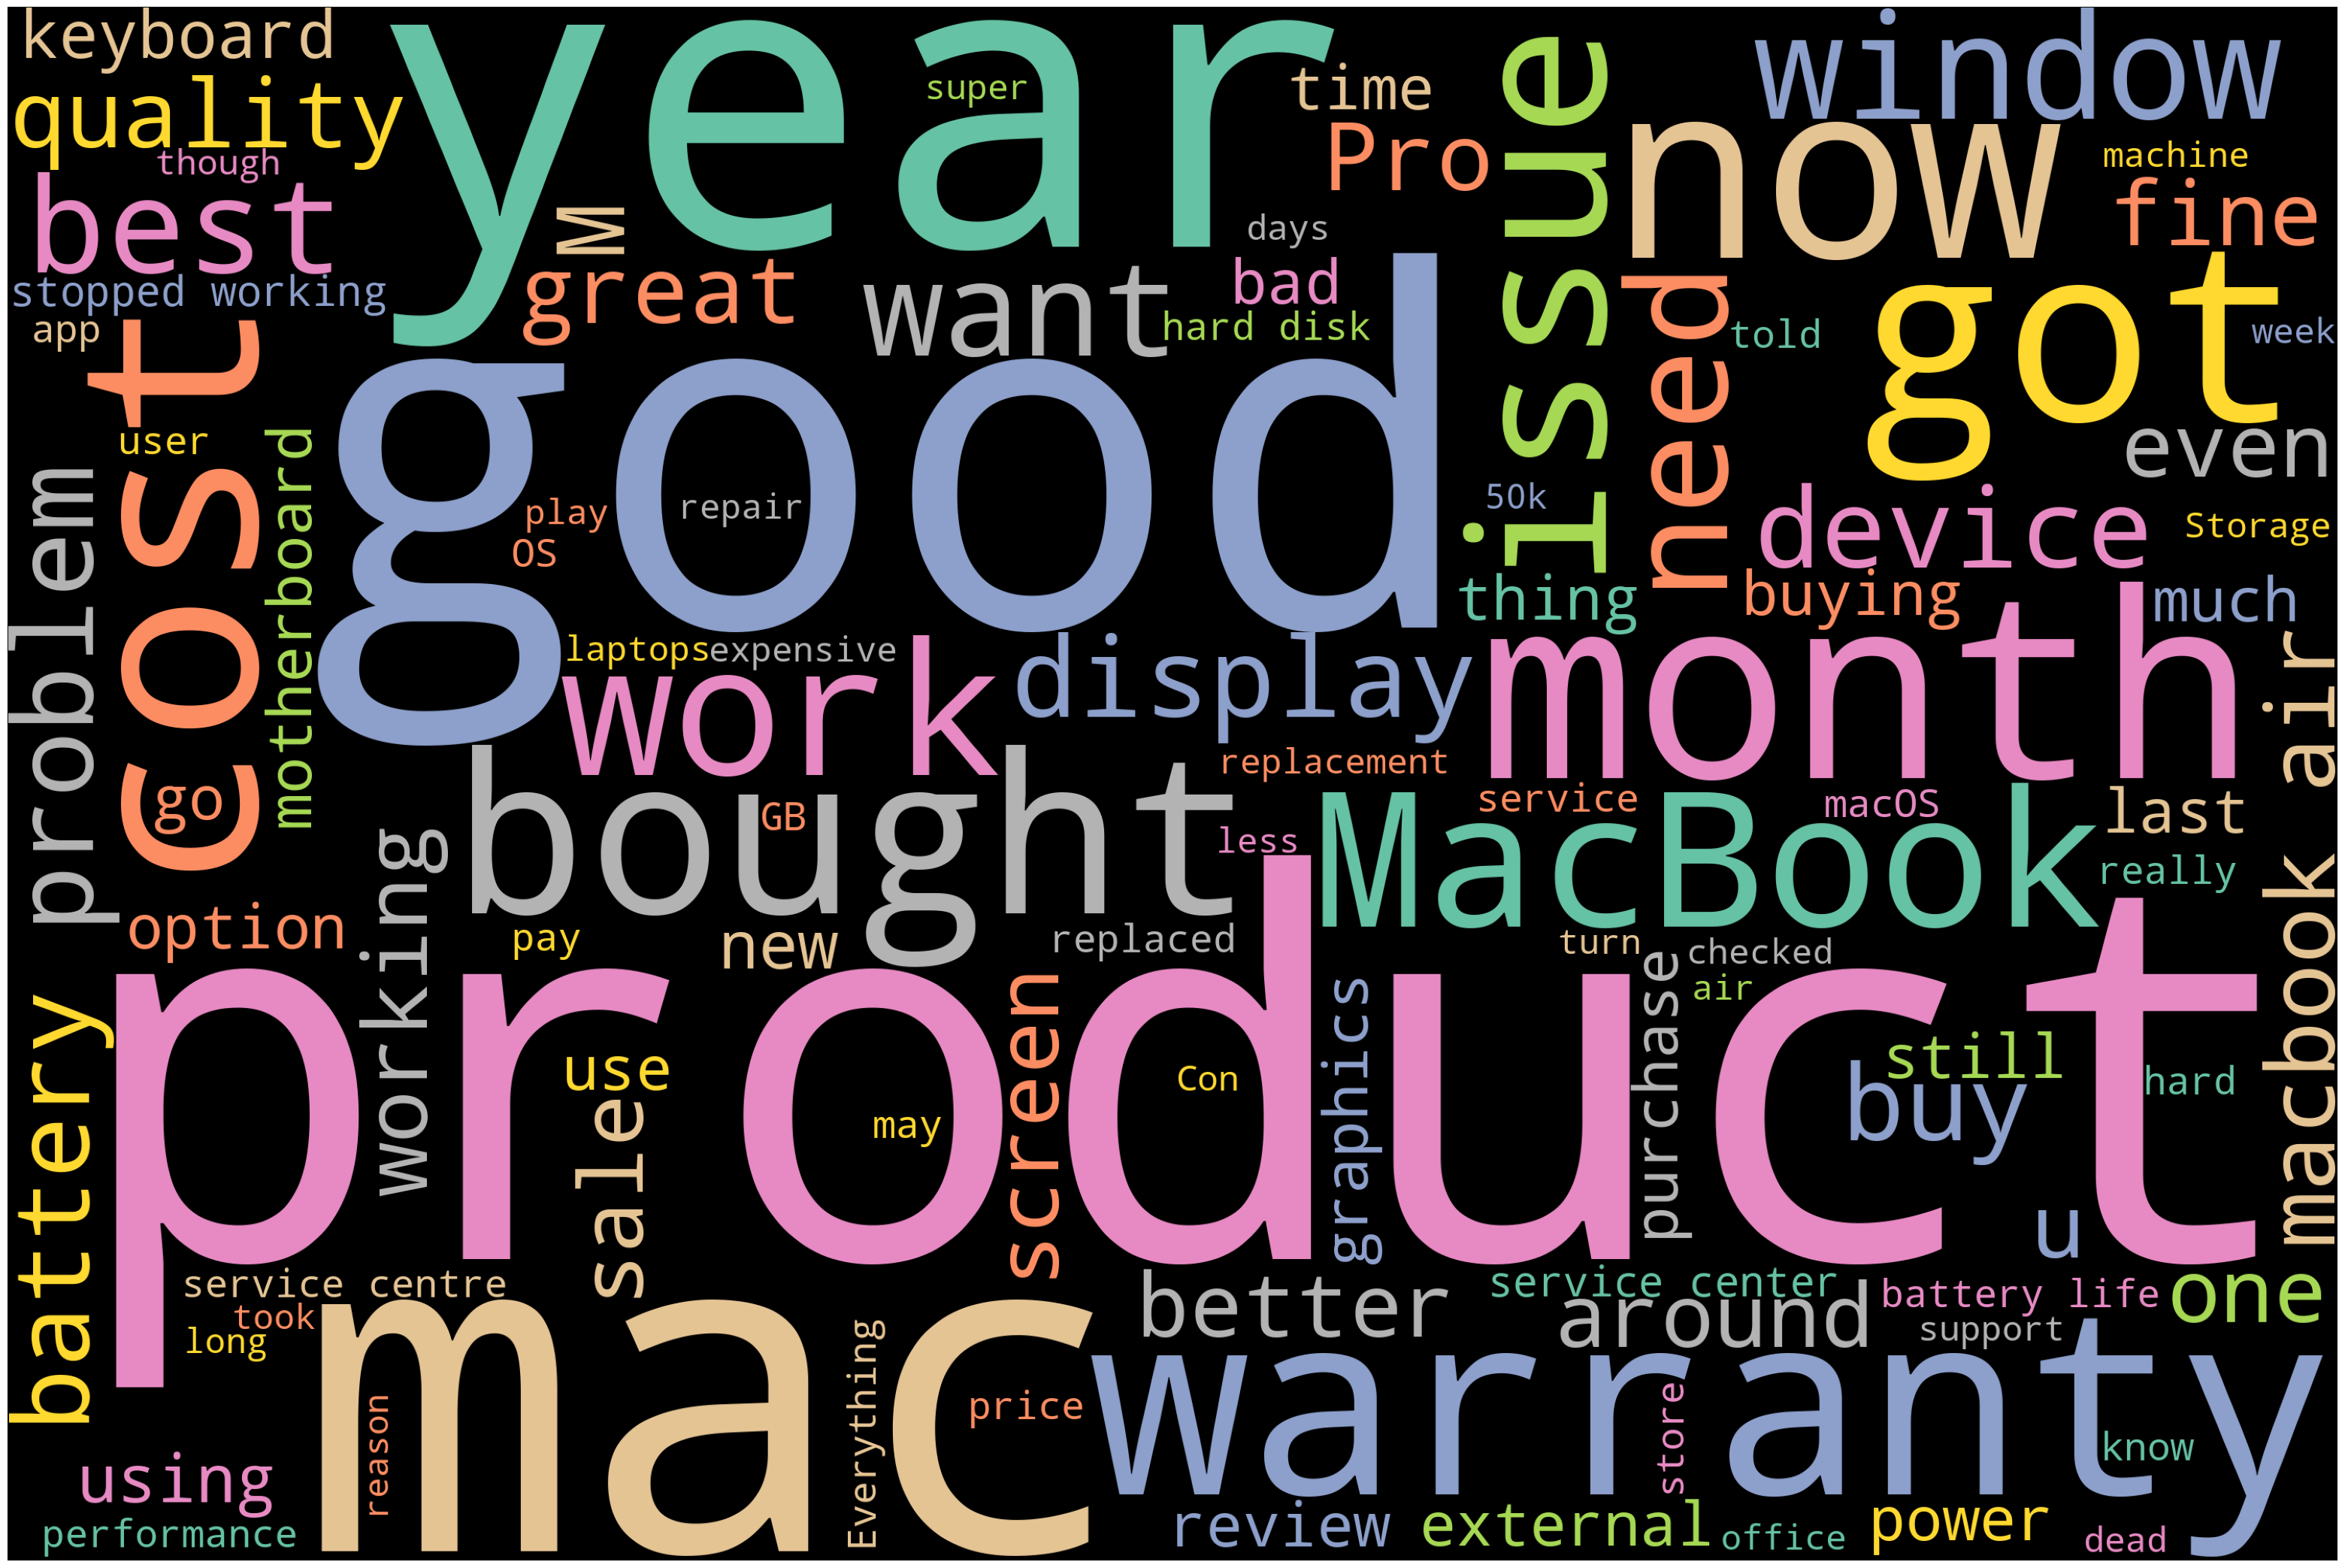

In [73]:
from wordcloud import wordcloud,STOPWORDS
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(review)
# Plot
plot_cloud(wordcloud)